# Autores:
- Marianne Solangel Rojas Robles
- Douglas Andrés Ramírez Brujes

**Universidad industrial de Santander**

**2019**

**Inteligencia Artificial**

# Cargado de las librerías

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
%matplotlib inline
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN

# Cargado del dataset



In [3]:
dataset1 = pd.read_csv("./data/anime_filtered.csv")
dataset2 = pd.read_csv("./data/anime_cleaned.csv")
dataset3 = pd.read_csv("./data/anime_simple_filtered.csv")
dataset4 = pd.read_csv("./data/anime_cleaned_parsed.csv")

datasets = [dataset1, dataset2]
datasets_c = [dataset1, dataset2, dataset3]
dataset3['score'] = dataset3['rating']

Matriz de correlaciones del dataset completo.

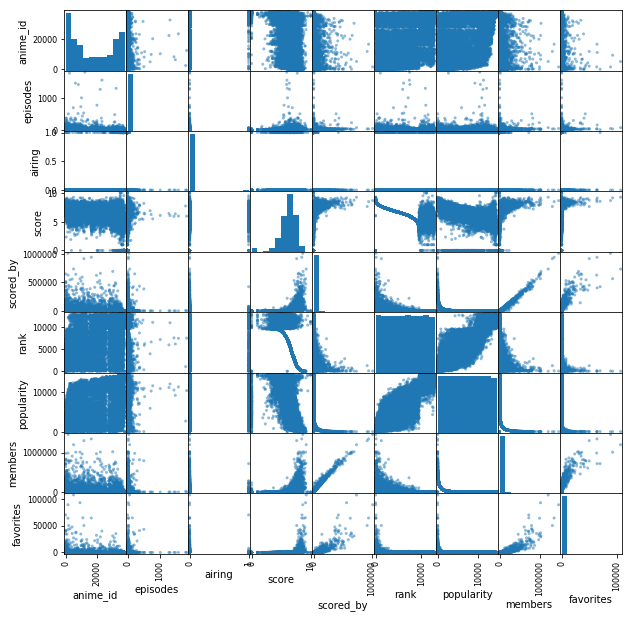

In [3]:
pd.plotting.scatter_matrix(dataset1, figsize=(10,10));

Matriz de correlaciones del dataset más filtrado.

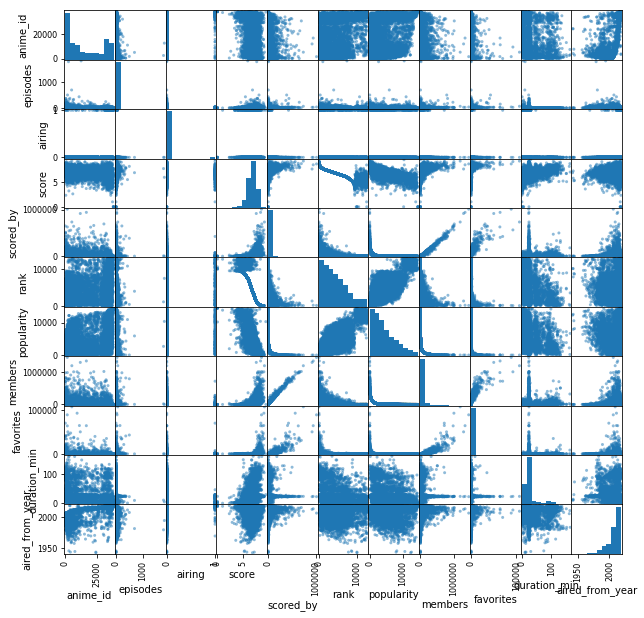

In [4]:
pd.plotting.scatter_matrix(dataset2, figsize=(10,10));

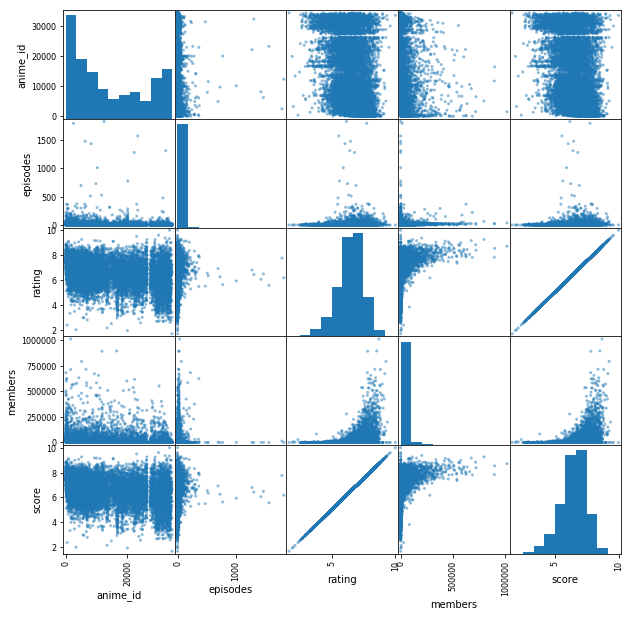

In [5]:
pd.plotting.scatter_matrix(dataset3, figsize=(10,10));    

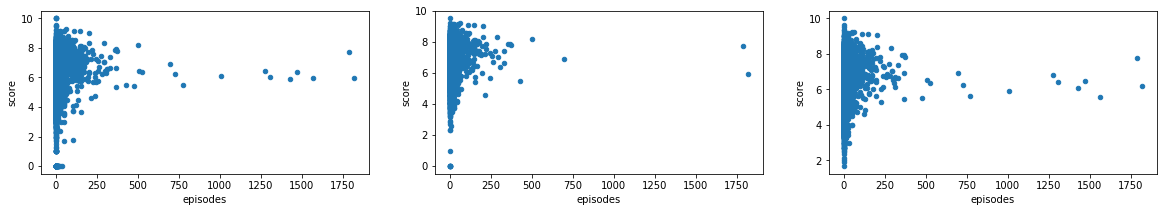

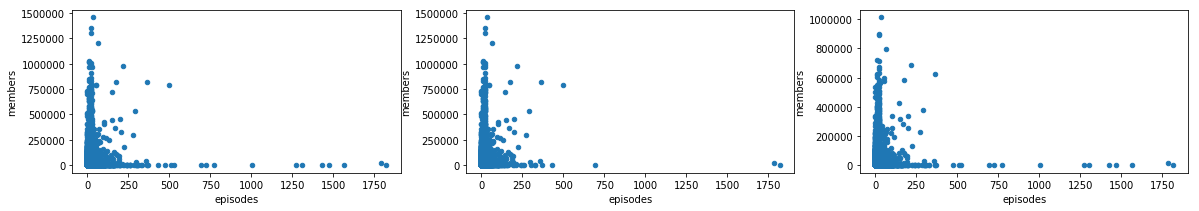

In [6]:
x = ["episodes", "episodes"];
y = ["score", "members"]

for j in range(len(x)):
    fig = plt.figure(figsize=(20,3))
    for i, dataset in enumerate(datasets_c):
        ax1 = fig.add_subplot(1, 3, i+1)
        dataset.plot.scatter(x[j], y[j], ax=ax1)


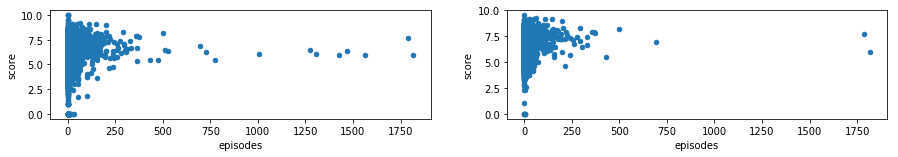

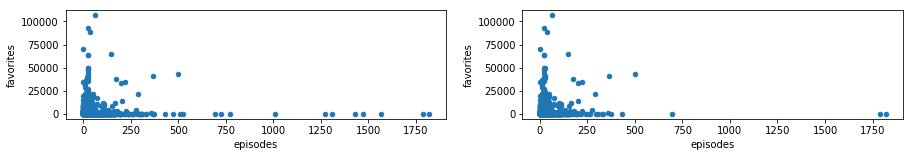

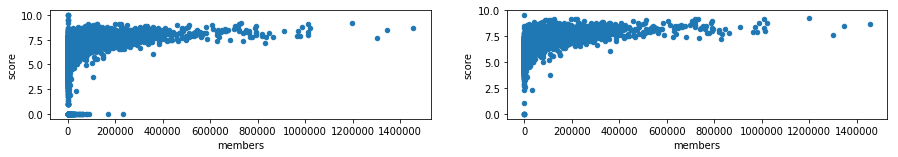

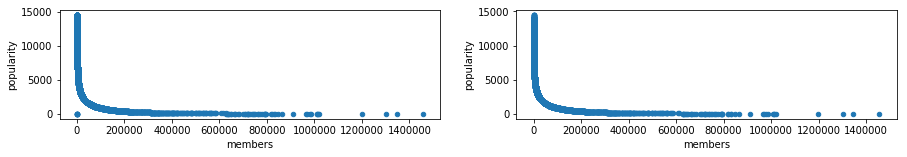

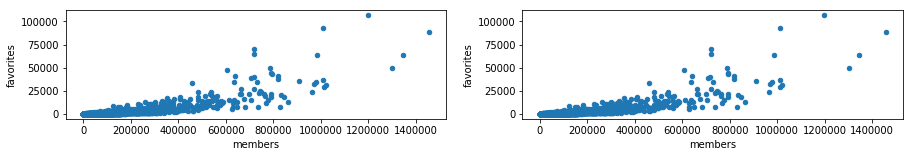

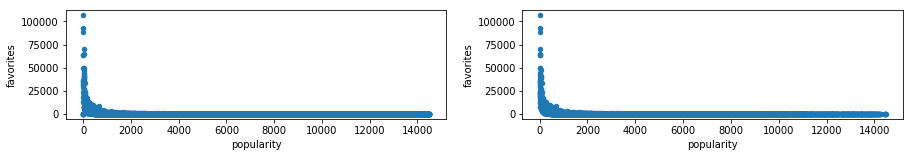

In [56]:
x = ["episodes", "episodes", "members", "members", "members", "popularity"];
y = ["score", "favorites", "score", "popularity", "favorites", "favorites"];

for j in range(len(x)):
    fig = plt.figure(figsize=(15,2))
    for i, dataset in enumerate(datasets):
        ax1 = fig.add_subplot(1, 2, i+1)
        dataset.plot.scatter(x[j], y[j], ax=ax1)



In [177]:
import pandas as pd
import numpy as np

class genres_bin:
    def __init__(self):
        self.base = 2
        self.suma = 0
        self.lista = np.zeros(17, np.int8)
    def romance(self):
        self.suma += self.base**16
        self.lista[0] = 1
    def shoujo(self):
        self.suma += self.base**15
        self.lista[1] = 1
    def ecchi(self):
        self.suma += self.base**14
        self.lista[2] = 1
    def shounen(self):
        self.suma += self.base**13
        self.lista[3] = 1
    def fantasy(self):
        self.suma += self.base**12
        self.lista[4] = 1
    def comedy(self):
        self.suma += self.base**11
        self.lista[5] = 1
    def music(self):
        self.suma += self.base**10
        self.lista[6] = 1
    def sports(self):
        self.suma += self.base**9
        self.lista[7] = 1
    def hentai(self):
        self.suma += self.base**8
        self.lista[8] = 1
    def historical(self):
        self.suma += self.base**7
        self.lista[9] = 1
    def mistery(self):
        self.suma += self.base**6
        self.lista[10] = 1
    def thriller(self):
        self.suma += self.base**5
        self.lista[11] = 1
    def supernatural(self):
        self.suma += self.base**4
        self.lista[12] = 1
    def gore(self):
        self.suma += self.base**3
        self.lista[13] = 1
    def sciFi(self):
        self.suma += self.base**2
        self.lista[14] = 1
    def action(self):
        self.suma += self.base**1
        self.lista[15] = 1
    def otro(self):
        self.suma += self.base**0
        self.lista[16] = 1
    def getSuma(self):
        return self.suma
    def getLista(self):
        return self.lista

def genre_parser(genre, genres_vec):
    sw = genres_vec;
    switcher={
        'Romance': sw.romance,
        'Shoujo': sw.shoujo,
        'Ecchi': sw.ecchi,
        'Shounen': sw.shounen,
        'Fantasy': sw.fantasy,
        'Comedy': sw.comedy,
        'Music': sw.music,
        'Sports': sw.sports,
        'Hentai': sw.hentai,
        'Historical': sw.historical,
        'Mistery': sw.mistery,
        'Thriller': sw.thriller,
        'Supernatural': sw.supernatural,
        'Gore': sw.gore,
        'Sci-Fi': sw.sciFi,
        'Action': sw.action
    }
    func=switcher.get(genre,sw.otro)

    return func(), sw.getLista(), sw.getSuma()

In [178]:
decimal = pd.Series(0 for i in range(len(dataset2['genre'])))

In [179]:
dataset2 = pd.read_csv("./data/anime_cleaned.csv")
data = dataset2['genre'][:] #Only the first 1k if you want to check it
for i in range(len(data)):
    if type(data.iloc[i]) == float:
        data.iloc[i] = 'none'

In [180]:
for i in range(len(data)):
    genre = data[i].split(', ')
    genres_vec = genres_bin()
    for k in genre:
        lista, suma = genre_parser(k, genres_vec)[1:]
    data[i] = lista
    decimal[i] = suma
    

In [198]:
data2 = data.values
counts = np.zeros(17, np.int8)
for i in range(len(data2)):
    for k in range(17):
        if data2[i][k]:
            counts[k] += 1
         

In [199]:
print counts

[-103  -72   -6  -98  -95  -51   73   82   75  -87    0   79   92    0   38
    3   93]


ValueError: x and y must be the same size

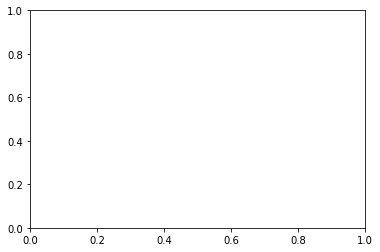

In [149]:

plt.scatter(data[:][1], dataset2['popularity'], c="blue", cmap='rainbow', alpha=0.3);

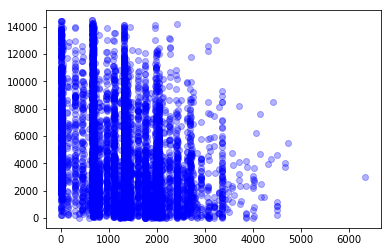

In [108]:
# Con los pesos invertidos
plt.scatter(data, dataset2['popularity'], c="blue", cmap='rainbow', alpha=0.3);

In [11]:
dataset4 = pd.read_csv("./data/anime_cleaned_parsed.csv") #ready transformed dataset
print dataset4['genre']

0       [1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0]
1       [1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1]
2       [0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1]
3       [1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1]
4       [1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1]
5       [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
6       [1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1]
7       [1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1]
8       [1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1]
9       [1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1]
10      [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1]
11      [1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1]
12      [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1]
13      [1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1]
14      [0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1]
15      [1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1]
16      [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
17      [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1]
18      [0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1]
19      [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1]
20      [1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1]
21      [0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1]
22      [1 1 0 0 0 1 0 0 0 0 0 0